# Video Games Challenge - Part 3: Analysis and Visualization

You are a data scientist in the video game edition business, and you are asked to identify which factors, and combinations of factors, make a game successful (both critically and commercially). Possible sources: IGN, Steam, GameSpot..


## Data preprocessing

### Read the data

In [91]:
import pandas as pd
import numpy as np
import scipy
import os
import os.path
from matplotlib import cm
from IPython.display import display, HTML
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 13, 9

In [151]:
# read csv file as a pandas data frame
df = pd.read_csv("Steam_dataset.csv")
# add index_col=0 to have a single index (and not a duplication)

In [152]:
df.head(3)

,game_id,Name,year,type,User_review,Number of reviews,Release_date,Language,Tags,Price,...,Historical,Building,Walking Simulator,World War I,Economy,Horror,Remake,Chinese,Spanish,Arabic
0,570,Dota 2,2018,Platinum,Very Positive,1058771,"9 Jul, 2013","['English', 'Bulgarian', 'Czech', 'Danish', 'D...","['Free to Play', 'MOBA', 'Multiplayer', 'Strat...",0.00,...,False,False,False,False,False,False,False,True,True,False
1,289070,Sid Meier’s Civilization® VI,2018,Platinum,Mixed,42471,"20 Oct, 2016","['English', 'French', 'Italian', 'German', 'Sp...","['Strategy', 'Turn-Based Strategy', 'Historica...",69.95,...,True,True,False,False,False,False,False,True,True,False
2,730,Counter-Strike: Global Offensive,2018,Platinum,Very Positive,3304339,"21 Aug, 2012","['English', 'Czech', 'Danish', 'Dutch', 'Finni...","['FPS', 'Shooter', 'Multiplayer', 'Competitive...",0.00,...,False,False,False,False,False,False,False,True,True,False


In [153]:
len(df)

505

### find duplicates

In [154]:
#example for 1 game
df[df['game_id']==570]

,game_id,Name,year,type,User_review,Number of reviews,Release_date,Language,Tags,Price,...,Historical,Building,Walking Simulator,World War I,Economy,Horror,Remake,Chinese,Spanish,Arabic
0,570,Dota 2,2018,Platinum,Very Positive,1058771,"9 Jul, 2013","['English', 'Bulgarian', 'Czech', 'Danish', 'D...","['Free to Play', 'MOBA', 'Multiplayer', 'Strat...",0.0,...,False,False,False,False,False,False,False,True,True,False
102,570,Dota 2,2018,"Over 100,000 Simultaneous Players",Very Positive,1058771,"9 Jul, 2013","['English', 'Bulgarian', 'Czech', 'Danish', 'D...","['Free to Play', 'MOBA', 'Multiplayer', 'Strat...",0.0,...,False,False,False,False,False,False,False,True,True,False
216,570,Dota 2,2017,Platinum,Very Positive,1058771,"9 Jul, 2013","['English', 'Bulgarian', 'Czech', 'Danish', 'D...","['Free to Play', 'MOBA', 'Multiplayer', 'Strat...",0.0,...,False,False,False,False,False,False,False,True,True,False
316,570,Dota 2,2017,"Over 100,000 Simultaneous Players",Very Positive,1058771,"9 Jul, 2013","['English', 'Bulgarian', 'Czech', 'Danish', 'D...","['Free to Play', 'MOBA', 'Multiplayer', 'Strat...",0.0,...,False,False,False,False,False,False,False,True,True,False
415,570,Dota 2,2016,Platinum,Very Positive,1058771,"9 Jul, 2013","['English', 'Bulgarian', 'Czech', 'Danish', 'D...","['Free to Play', 'MOBA', 'Multiplayer', 'Strat...",0.0,...,False,False,False,False,False,False,False,True,True,False


In [155]:
# count all duplicates
df['game_id'].value_counts()

346110    5
4000      5
281990    5
238960    5
236390    5
377160    5
386360    5
236850    5
289070    5
49520     5
381210    5
242760    5
218620    5
8930      5
255710    5
730       5
322330    5
221380    5
292030    5
268500    5
105600    5
359550    5
394360    5
252490    5
365590    5
570       5
374320    5
252950    5
230410    5
107410    5
         ..
611500    1
813820    1
287700    1
371660    1
353370    1
620       1
489940    1
838350    1
295110    1
437220    1
392160    1
473690    1
372000    1
363970    1
429660    1
205100    1
581320    1
48700     1
599140    1
337000    1
755790    1
588430    1
589360    1
360430    1
554620    1
373420    1
414340    1
646910    1
298110    1
834910    1
Name: game_id, Length: 200, dtype: int64

## Data selecting

In [156]:
# Select only best sellers for 2018
df = df[((df['type'] == 'Platinum') | (df['type'] == 'Gold') | (df['type'] == 'Silver') | (df['type'] == 'Bronze')) & (df['year'] == 2018)]

In [157]:
len(df)

100

In [158]:
df[df['game_id']==570]

,game_id,Name,year,type,User_review,Number of reviews,Release_date,Language,Tags,Price,...,Historical,Building,Walking Simulator,World War I,Economy,Horror,Remake,Chinese,Spanish,Arabic
0,570,Dota 2,2018,Platinum,Very Positive,1058771,"9 Jul, 2013","['English', 'Bulgarian', 'Czech', 'Danish', 'D...","['Free to Play', 'MOBA', 'Multiplayer', 'Strat...",0.0,...,False,False,False,False,False,False,False,True,True,False


In [159]:
len(df)

100

## data cleaning

In [160]:
# select relevant columns (with the most frequent tags)
df=df[['Name','type','User_review','Number of reviews','Release_date','Price','Publisher','Number of languages','System Requirements','Multiplayer','Singleplayer','Action','Co-op','Open World','Adventure','Strategy','Atmospheric','Great Soundtrack','Simulation']]

In [161]:
df.head()

,Name,type,User_review,Number of reviews,Release_date,Price,Publisher,Number of languages,System Requirements,Multiplayer,Singleplayer,Action,Co-op,Open World,Adventure,Strategy,Atmospheric,Great Soundtrack,Simulation
0,Dota 2,Platinum,Very Positive,1058771,"9 Jul, 2013",0.00,Valve,26.0,Minimum:OS: Windows 7 or newerProcessor: Dual ...,True,False,True,True,False,False,True,False,False,True
1,Sid Meier’s Civilization® VI,Platinum,Mixed,42471,"20 Oct, 2016",69.95,"2K, Aspyr (Mac), Aspyr (Linux)",12.0,Minimum:Requires a 64-bit processor and operat...,True,True,False,True,False,False,True,True,True,True
2,Counter-Strike: Global Offensive,Platinum,Very Positive,3304339,"21 Aug, 2012",0.00,Valve,25.0,Minimum:OS: Windows® 7/Vista/XPProcessor: Inte...,True,False,True,True,False,False,True,False,False,False
3,The Elder Scrolls® Online,Platinum,Mostly Positive,41274,"4 Apr, 2014",23.90,Bethesda Softworks,3.0,Minimum:OS: Windows 7 64-bitProcessor: Intel® ...,True,True,True,True,True,True,False,True,True,False
4,Rocket League®,Platinum,Very Positive,215037,"7 Jul, 2015",19.00,"Psyonix, Inc.",12.0,Minimum:OS: Windows 7 or NewerProcessor: 2.4 G...,True,True,True,True,False,False,False,False,True,False


In [162]:
#Check if NaN values
df.isna().sum()

Name                   0
type                   0
User_review            0
Number of reviews      0
Release_date           0
Price                  0
Publisher              0
Number of languages    0
System Requirements    0
Multiplayer            0
Singleplayer           0
Action                 0
Co-op                  0
Open World             0
Adventure              0
Strategy               0
Atmospheric            0
Great Soundtrack       0
Simulation             0
dtype: int64

### Release date

In [167]:
#transform into time series
df['Release_date'] = pd.to_datetime(df['Release_date'])

### tags

In [168]:
# define top tags list
tags_list=['Multiplayer','Singleplayer','Action','Co-op','Open World','Adventure','Strategy','Atmospheric','Great Soundtrack','Simulation']

In [169]:
#replace boolean by numbers
for tag in tags_list:
    df[tag][df[tag]==True]=1
    df[tag][df[tag]==False]=0

C:\Users\thiba\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\thiba\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\thiba\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\thiba\Anaconda3\lib\site-packages\ipykernel_launcher.py:2

In [170]:
df.head()

,Name,type,User_review,Number of reviews,Release_date,Price,Publisher,Number of languages,System Requirements,Multiplayer,Singleplayer,Action,Co-op,Open World,Adventure,Strategy,Atmospheric,Great Soundtrack,Simulation
0,Dota 2,Platinum,Very Positive,1058771,2013-07-09,0.00,Valve,26.0,Minimum:OS: Windows 7 or newerProcessor: Dual ...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,Sid Meier’s Civilization® VI,Platinum,Mixed,42471,2016-10-20,69.95,"2K, Aspyr (Mac), Aspyr (Linux)",12.0,Minimum:Requires a 64-bit processor and operat...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0
2,Counter-Strike: Global Offensive,Platinum,Very Positive,3304339,2012-08-21,0.00,Valve,25.0,Minimum:OS: Windows® 7/Vista/XPProcessor: Inte...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,The Elder Scrolls® Online,Platinum,Mostly Positive,41274,2014-04-04,23.90,Bethesda Softworks,3.0,Minimum:OS: Windows 7 64-bitProcessor: Intel® ...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0
4,Rocket League®,Platinum,Very Positive,215037,2015-07-07,19.00,"Psyonix, Inc.",12.0,Minimum:OS: Windows 7 or NewerProcessor: 2.4 G...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


## Plotting

### continuous plot

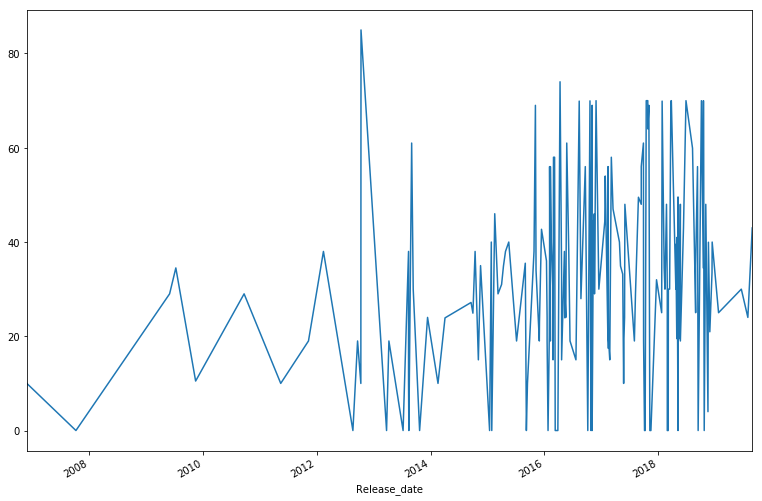

In [172]:
# plot the price vs release date
df_ts['Price'].plot()
plt.show()

In [173]:
# class
types=list(df['type'].unique())
types

['Platinum', 'Gold', 'Silver', 'Bronze']

In [349]:
# plot the price vs release date
colors=['blue','goldenrod','grey','brown']

In [222]:
# set fifure size
from pylab import rcParams
rcParams['figure.figsize'] = 13, 9

### Scatter plot

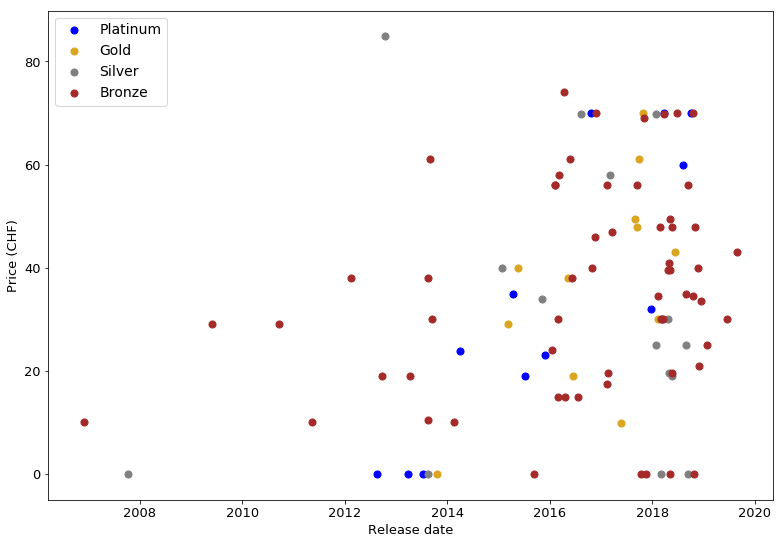

In [350]:
# scatterplot the price vs release date for the different classes
for i in range(len(types)):
    plt.scatter(x=df[df['type']==types[i]]['Release_date'], y=df[df['type']==types[i]]['Price'], label=types[i], s=50, color=colors[i], alpha = 1)
plt.legend(loc='upper left',prop={'size': 14})
plt.ylabel("Price (CHF)",fontsize=13)
plt.xlabel("Release date",fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

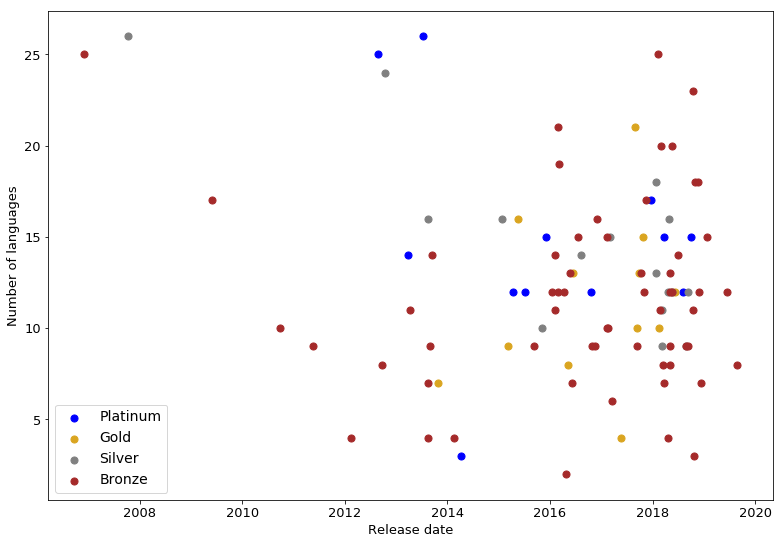

In [351]:
#scatterplot the number of languages vs release date for the different classes
for i in range(len(types)):
    plt.scatter(x=df[df['type']==types[i]]['Release_date'], y=df[df['type']==types[i]]['Number of languages'], label=types[i], s=50, color=colors[i], alpha = 1)
plt.legend(loc='lower left',prop={'size': 14})
plt.ylabel("Number of languages",fontsize=13)
plt.xlabel("Release date",fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

In [227]:
#find the most expensive game
most_expensive_game=df.nlargest(1,'Price')['Name'].values
most_expensive_game=most_expensive_game[0]
most_expensive_game

'Euro Truck Simulator 2'

In [228]:
df[df['Name']=='Euro Truck Simulator 2']

,Name,type,User_review,Number of reviews,Release_date,Price,Publisher,Number of languages,System Requirements,Multiplayer,Singleplayer,Action,Co-op,Open World,Adventure,Strategy,Atmospheric,Great Soundtrack,Simulation
24,Euro Truck Simulator 2,Silver,Overwhelmingly Positive,147538,2012-10-12,85.0,SCS Software,24.0,Minimum:OS: Windows 7Processor: Dual core CPU ...,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0


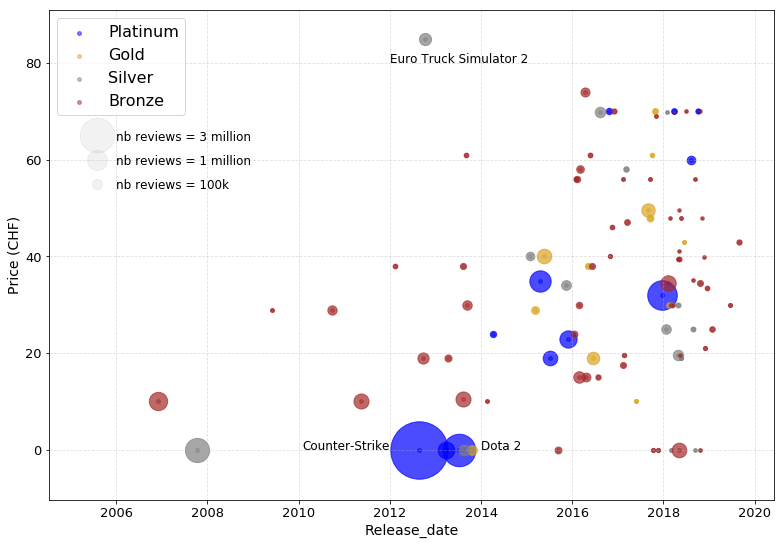

<Figure size 936x648 with 0 Axes>

In [365]:
#scatterplot the price vs release date for the different classes with dots proportional with the number of reviews
for i in range(len(types)):
    plt.scatter(x=df[df['type']==types[i]]['Release_date'], y=df[df['type']==types[i]]['Price'], label=types[i], s=15, color=colors[i], alpha = 0.5)
for j in range(len(types)):
    classtype=df[df['type']==types[j]]
    xx=classtype['Release_date'].values
    yy=classtype['Price'].values
    zz=classtype['Number of reviews'].values
    color=colors[j]
    for k in range(len(yy)):
        size=zz[k]/1000
        plt.scatter(x=xx[k], y=yy[k], color=color, s=size, alpha = 0.7)
# add legend for size of dot proportional to number of reviews
plt.scatter(x=datetime(2005,8,1),y=65,color='grey', s=1200, alpha = 0.1)
plt.text(x=datetime(2006,1,1),y=64, s='nb reviews = 3 million ', fontsize=12, color='black', rotation=0)
plt.scatter(x=datetime(2005,8,1),y=60,color='grey', s=400, alpha = 0.1)
plt.text(x=datetime(2006,1,1),y=59, s='nb reviews = 1 million ', fontsize=12, color='black', rotation=0)
plt.scatter(x=datetime(2005,8,1),y=55,color='grey', s=100, alpha = 0.1)
plt.text(x=datetime(2006,1,1),y=54, s='nb reviews = 100k ', fontsize=12, color='black', rotation=0)
# Add a legend and display the plots
plt.text(x=datetime(2012,1,1),y=80, s=most_expensive_game, fontsize=12, color='black', rotation=0)
plt.text(x=datetime(2010,2,1),y=0, s='Counter-Strike', fontsize=12, color='black', rotation=0)
plt.text(x=datetime(2014,1,1),y=0, s='Dota 2', fontsize=12, color='black', rotation=0)
plt.grid(ls='--',alpha=0.4)
plt.ylabel("Price (CHF)",fontsize=14)
plt.xlabel("Release_date",fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(loc='upper left',prop={'size': 16})
plt.show()
plt.savefig("Fig1")

In [232]:
df['Publisher'].value_counts()

Ubisoft                                                            9
Paradox Interactive                                                7
Valve                                                              5
Square Enix                                                        4
BANDAI NAMCO Entertainment                                         4
2K, Aspyr (Mac), Aspyr (Linux)                                     3
SEGA                                                               3
Bethesda Softworks                                                 3
Hi-Rez Studios                                                     2
2K                                                                 2
Focus Home Interactive                                             2
Frontier Developments                                              2
SEGA, Feral Interactive (Mac), Feral Interactive (Linux)           2
WB Games                                                           1
Activision                        

In [244]:
types_gold_platinum=types[:2]
types_gold_platinum

['Platinum', 'Gold']

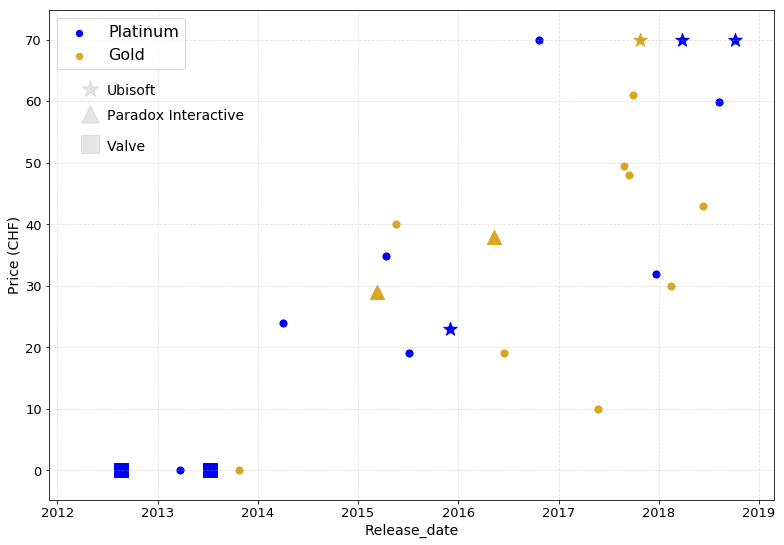

<Figure size 936x648 with 0 Axes>

In [371]:
#scatterplot the price vs release date for the different 2 classes (platinum and gold) with different markers for the different publishers
for i in range(len(types_gold_platinum)):
    plt.scatter(x=df[df['type']==types_gold_platinum[i]]['Release_date'], y=df[df['type']==types_gold_platinum[i]]['Price'], label=types_gold_platinum[i], s=40, color=colors[i], alpha = 1)
for j in range(len(types_gold_platinum)):
    classtype=df[df['type']==types_gold_platinum[j]]
    xx=classtype['Release_date'].values
    yy=classtype['Price'].values
    zz=classtype['Publisher'].values
    color=colors[j]
    for k in range(len(yy)):
        if zz[k]=='Ubisoft':
            plt.scatter(x=xx[k], y=yy[k], color=color, s=200, marker='*', alpha = 1)
        elif zz[k]=='Paradox Interactive':
            plt.scatter(x=xx[k], y=yy[k], color=color, s=200, marker='^', alpha = 1)
        elif zz[k]=='Valve':
            plt.scatter(x=xx[k], y=yy[k], color=color, s=200, marker='s', alpha = 1)
        else:
            plt.scatter(x=xx[k], y=yy[k], color=color, s=200, marker='.', alpha = 1)
# add legend for publisher
plt.scatter(x=datetime(2012,5,1),y=62,color='grey', marker='*', s=300, alpha = 0.2)
plt.text(x=datetime(2012,7,1),y=61, s='Ubisoft', fontsize=14, color='black', rotation=0)
plt.scatter(x=datetime(2012,5,1),y=58,color='grey', marker='^', s=300, alpha = 0.2)
plt.text(x=datetime(2012,7,1),y=57, s='Paradox Interactive', fontsize=14, color='black', rotation=0)
plt.scatter(x=datetime(2012,5,1),y=53,color='grey', marker='s', s=300, alpha = 0.2)
plt.text(x=datetime(2012,7,1),y=52, s='Valve', fontsize=14, color='black', rotation=0)
# Add a legend and display the plots
plt.grid(ls='--',alpha=0.4)
plt.ylabel("Price (CHF)",fontsize=14)
plt.xlabel("Release_date",fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(loc='upper left',prop={'size': 16})
plt.show()
plt.savefig("Fig2")

In [409]:
#set arrow properties
arrow_properties = dict(
    facecolor="black", width=0.5,
    headwidth=9, shrink=0.1)

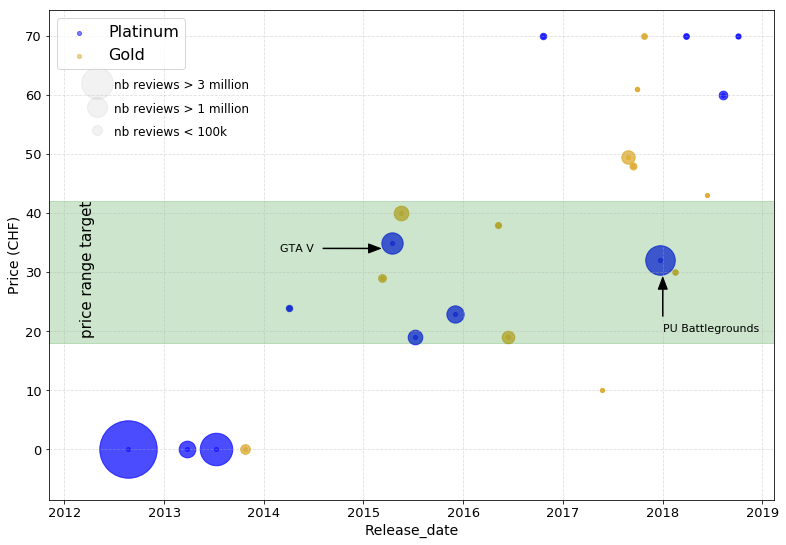

<Figure size 936x648 with 0 Axes>

In [425]:
# plots
for i in range(len(types_gold_platinum)):
    plt.scatter(x=df[df['type']==types_gold_platinum[i]]['Release_date'], y=df[df['type']==types_gold_platinum[i]]['Price'], label=types[i], s=17, color=colors[i], alpha = 0.5)
for j in range(len(types_gold_platinum)):
    classtype=df[df['type']==types_gold_platinum[j]]
    xx=classtype['Release_date'].values
    yy=classtype['Price'].values
    zz=classtype['Number of reviews'].values
    color=colors[j]
    for k in range(len(yy)):
        size=zz[k]/1000
        plt.scatter(x=xx[k], y=yy[k], color=color, s=size, alpha = 0.7)
# add legend for size of dot proportional to number of reviews
plt.scatter(x=datetime(2012,5,1),y=62,color='grey', s=1000, alpha = 0.1)
plt.text(x=datetime(2012,7,1),y=61, s='nb reviews > 3 million ', fontsize=12, color='black', rotation=0)
plt.scatter(x=datetime(2012,5,1),y=58,color='grey', s=400, alpha = 0.1)
plt.text(x=datetime(2012,7,1),y=57, s='nb reviews > 1 million ', fontsize=12, color='black', rotation=0)
plt.scatter(x=datetime(2012,5,1),y=54,color='grey', s=100, alpha = 0.1)
plt.text(x=datetime(2012,7,1),y=53, s='nb reviews < 100k ', fontsize=12, color='black', rotation=0)
#plt.axhspan(20, 40, label="Recession in Switzerland", color="crimson", alpha=0.3)
plt.axhspan(18, 42, color="green", alpha=0.2)
plt.text(x=datetime(2012,3,1),y=40, s='price range target', fontsize=15, rotation=90)
# add special games
#plt.text(x=datetime(2014,3,1),y=40, s='PU Battlegrounds', fontsize=15, rotation=90)
#plt.text(x=datetime(2013,3,1),y=40, s='GTA V', fontsize=15, rotation=90)
plt.annotate(
    "PU Battlegrounds", xy=(datetime(2018,1,1), 30),
    xytext=(datetime(2018,1,1), 20),
    arrowprops=arrow_properties,size=11,rotation=0)
plt.annotate(
    "GTA V", xy=(datetime(2015,4,1), 34),
    xytext=(datetime(2014,3,1), 33.5),
    arrowprops=arrow_properties,size=11,rotation=0)
# Add a legend and display the plots
plt.grid(ls='--',alpha=0.4)
plt.ylabel("Price (CHF)",fontsize=14)
plt.xlabel("Release_date",fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(loc='upper left',prop={'size': 16})
plt.show()
plt.savefig("Fig3")

### faceting

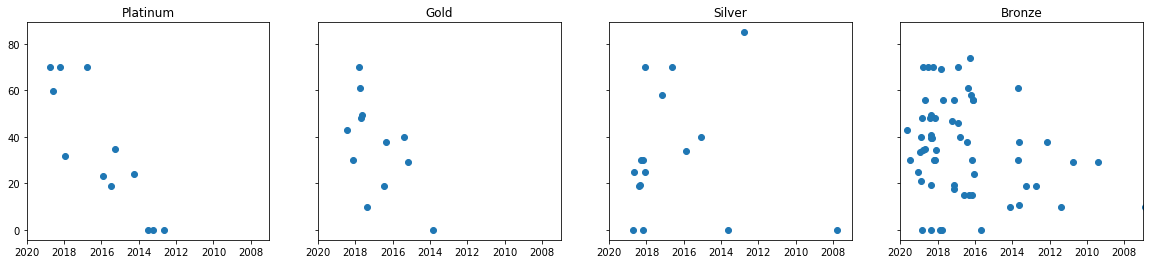

In [397]:
# Facet by class, show price vs release date
fig, axs = plt.subplots(1, 4, figsize=(20, 4), sharex=True, sharey=True)
index = 0
for typ in types:
    ax = axs[index]
    ax.plot(df[df['type']==typ]['Release_date'], df[df['type']==typ]['Price'], marker='.', linestyle='', ms=12, label=typ)
    #ax.set_xlim([1, 8])
    ax.set_xlim([datetime(2020,1,1), datetime(2007,1,1)])
    ax.set_title(typ)
    index += 1

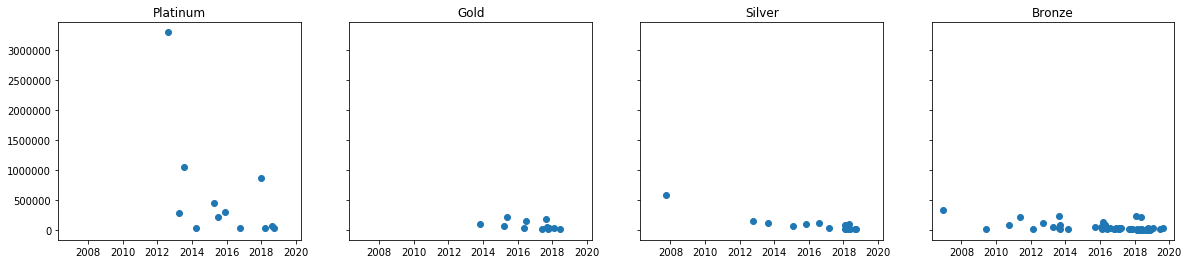

In [444]:
# Facet by class, number of reviews vs release date
fig, axs = plt.subplots(1, 4, figsize=(20, 4), sharex=True, sharey=True)
index = 0
groups
for typ in types:
    ax = axs[index]
    ax.plot(df[df['type']==typ]['Release_date'], df[df['type']==typ]['Number of reviews'], marker='.', linestyle='', ms=12, label=typ)
    #ax.set_xlim([1, 8])
    #ax.set_ylim([10, 50])
    ax.set_title(typ)
    index += 1

In [320]:
df.nlargest(1,'Price')

,Name,type,User_review,Number of reviews,Release_date,Price,Publisher,Number of languages,System Requirements,Multiplayer,Singleplayer,Action,Co-op,Open World,processor_min,ram_min,graph_min
24,Euro Truck Simulator 2,Silver,Overwhelmingly Positive,147538,2012-10-12,85.0,SCS Software,24.0,Minimum:OS: Windows 7Processor: Dual core CPU ...,False,True,True,False,True,Dual core CPU 2.4 GHzMemory,4 GB RAM,GeForce GTS 450-class (Intel HD 4000)Hard Drive


In [330]:
#game with the most reviews
df.nlargest(1,'Number of reviews')

,Name,type,User_review,Number of reviews,Release_date,Price,Publisher,Number of languages,System Requirements,Multiplayer,Singleplayer,Action,Co-op,Open World,processor_min,ram_min,graph_min
2,Counter-Strike: Global Offensive,Platinum,Very Positive,3304339,2012-08-21,0.0,Valve,25.0,Minimum:OS: Windows® 7/Vista/XPProcessor: Inte...,True,False,True,True,False,intel Core i2,2 GB RAM,Video card must be 256 MB or more and should ...


In [328]:
most_reviewed_game=df.nlargest(1,'Number of reviews')['Name'].values
most_reviewed_game=most_reviewed_game[0]
most_reviewed_game

'Counter-Strike: Global Offensive'

In [423]:
most_expensive_game=df.nlargest(1,'Price')['Name'].values
most_expensive_game=most_expensive_game[0]
most_expensive_game

'Euro Truck Simulator 2'

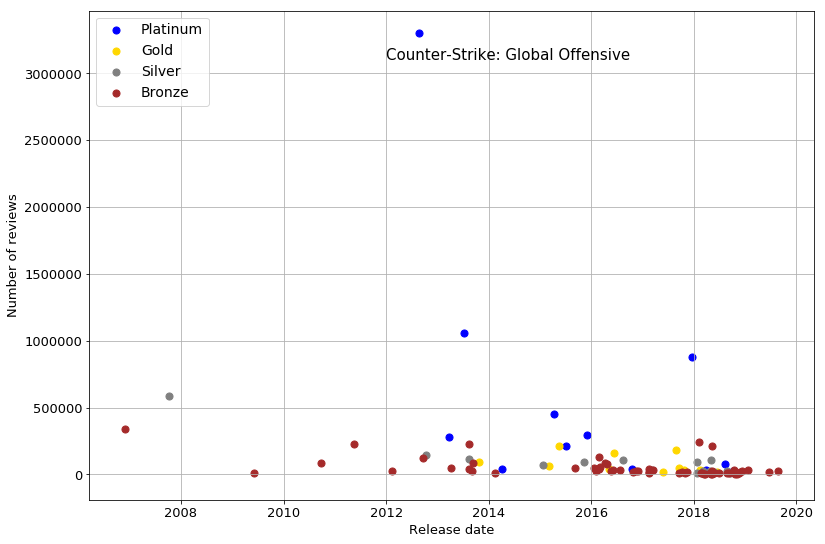

In [349]:
# Scatterplot number of reviews vs release date
plt.grid()
for i in range(len(types)):
    for element in 
    plt.scatter(x=df[df['type']==types[i]]['Release_date'], y=df[df['type']==types[i]]['Number of reviews'], label=types[i], s=50, color=colors[i], alpha = 1)
plt.text(x=datetime(2012,1,1),y=3100000, s=most_reviewed_game, fontsize=15, color='black', rotation=0)
plt.legend(loc='upper left',prop={'size': 14})
plt.ylabel("Number of reviews",fontsize=13)
plt.xlabel("Release date",fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

In [435]:
groups = df.groupby(['type'])
groups

In [392]:
df[['type','Number of languages']].groupby(['type']).mean()

,Number of languages
type,
Bronze,11.716667
Gold,11.500000
Platinum,14.833333
Silver,14.562500


In [269]:
number_of_reviews=df[['type','Number of reviews']].groupby(['type']).mean()
number_of_reviews=number_of_reviews.sort_values(by=['Number of reviews'])
number_of_reviews

,Number of reviews
type,
Bronze,48445.700000
Gold,76562.166667
Silver,93540.375000
Platinum,559047.000000


### Barplot

#### User review

In [280]:
def plot_bar_x(df,xlabel):
    # this is for plotting purpose
    #lab=list(df[xlabel].unique())
    index = np.arange(len(types))
    df.plot.bar()
    plt.grid()
    plt.xlabel('Best seller category', fontsize=15)
    plt.xticks(index, types, fontsize=15, rotation=0, horizontalalignment='right')
    plt.title('Burtin Dataset')
    plt.show()

In [281]:
types

['Platinum', 'Gold', 'Silver', 'Bronze']

In [272]:
users_reviews=pd.crosstab(df['type'], df['User_review'])
users_reviews

User_review,Mixed,Mostly Negative,Mostly Positive,Overwhelmingly Positive,Very Positive
type,,,,,
Bronze,6,3,15,9,27
Gold,1,0,5,2,4
Platinum,3,0,3,0,6
Silver,2,0,6,1,7


In [273]:
users_reviews = users_reviews.reindex(index = types)

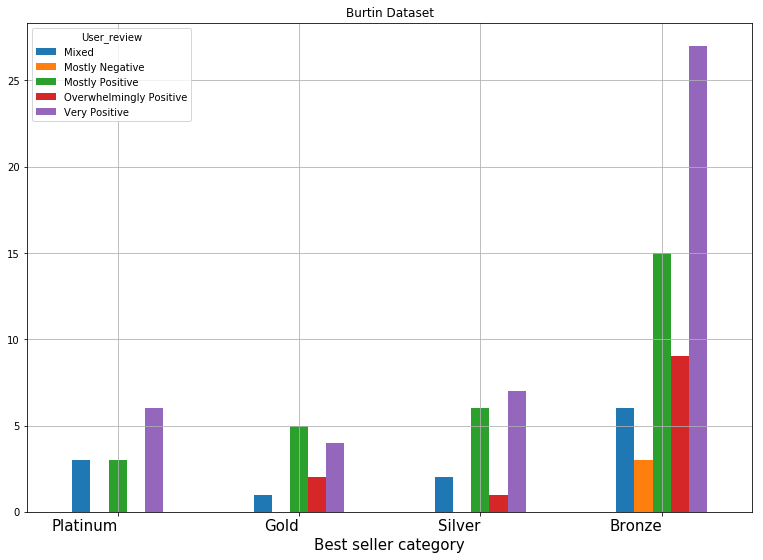

In [282]:
plot_bar_x(users_reviews,types)

In [276]:
users_reviews = users_reviews.reindex(index = types)

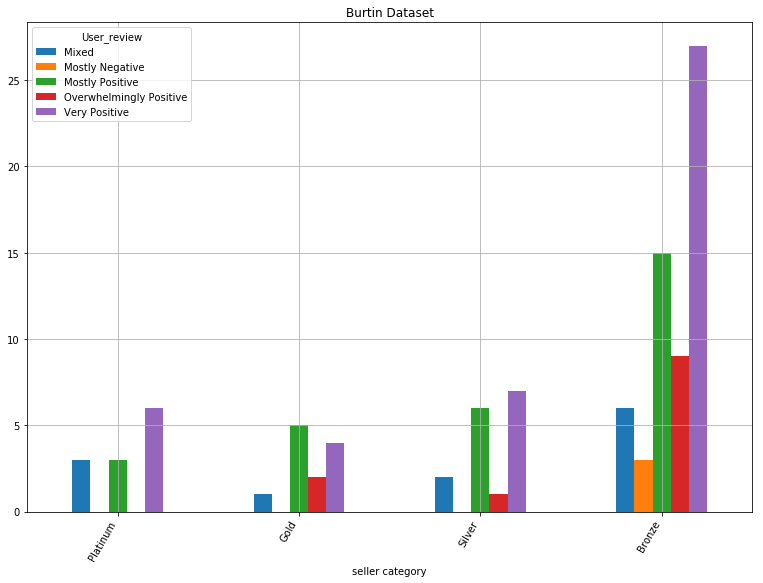

In [277]:
plot_bar_x(users_reviews,types)

In [350]:
df['User_review'].unique()

array(['Very Positive', 'Mixed', 'Mostly Positive',
       'Overwhelmingly Positive', 'Mostly Negative'], dtype=object)

#### Tags

In [284]:
tags_list

['Multiplayer',
 'Singleplayer',
 'Action',
 'Co-op',
 'Open World',
 'Adventure',
 'Strategy',
 'Atmospheric',
 'Great Soundtrack',
 'Simulation']

In [287]:
count_tags=df[tags_list].apply(pd.value_counts,axis=0)

In [288]:
count_tags=count_tags.T

In [292]:
#Count the tags for all types
top_tags=pd.pivot_table(df[['type','Multiplayer',
 'Singleplayer',
 'Action',
 'Co-op',
 'Open World',
 'Adventure',
 'Strategy',
 'Atmospheric',
 'Great Soundtrack',
 'Simulation']], index='type', aggfunc='sum')
top_tags

,Action,Adventure,Atmospheric,Co-op,Great Soundtrack,Multiplayer,Open World,Simulation,Singleplayer,Strategy
type,,,,,,,,,,
Bronze,42.0,29.0,29.0,39.0,27.0,52.0,36.0,27.0,54.0,34.0
Gold,10.0,9.0,8.0,6.0,8.0,9.0,8.0,4.0,9.0,7.0
Platinum,11.0,5.0,7.0,11.0,7.0,12.0,5.0,4.0,9.0,5.0
Silver,15.0,13.0,11.0,7.0,6.0,11.0,14.0,6.0,14.0,4.0


In [293]:
top_tags.T

type,Bronze,Gold,Platinum,Silver
Action,42.0,10.0,11.0,15.0
Adventure,29.0,9.0,5.0,13.0
Atmospheric,29.0,8.0,7.0,11.0
Co-op,39.0,6.0,11.0,7.0
Great Soundtrack,27.0,8.0,7.0,6.0
Multiplayer,52.0,9.0,12.0,11.0
Open World,36.0,8.0,5.0,14.0
Simulation,27.0,4.0,4.0,6.0
Singleplayer,54.0,9.0,9.0,14.0
Strategy,34.0,7.0,5.0,4.0


In [300]:
df_best=df[(df['type']=='Platinum') | (df['type']=='Gold') | (df['type']=='Silver')]

In [301]:
len(df_best)

40

In [302]:
#Count the tags for platinum and gold types
top_tags_best=pd.pivot_table(df_best[['type','Multiplayer',
 'Singleplayer',
 'Action',
 'Co-op',
 'Open World',
 'Adventure',
 'Strategy',
 'Atmospheric',
 'Great Soundtrack',
 'Simulation']], index='type', aggfunc='sum')
top_tags_best

,Action,Adventure,Atmospheric,Co-op,Great Soundtrack,Multiplayer,Open World,Simulation,Singleplayer,Strategy
type,,,,,,,,,,
Gold,10.0,9.0,8.0,6.0,8.0,9.0,8.0,4.0,9.0,7.0
Platinum,11.0,5.0,7.0,11.0,7.0,12.0,5.0,4.0,9.0,5.0
Silver,15.0,13.0,11.0,7.0,6.0,11.0,14.0,6.0,14.0,4.0


In [390]:
#define plotbar function
def plot_bar_x(df,types):
    # this is for plotting purpose
    #lab=list(df[xlabel].unique())
    index = np.arange(len(types))
    df.plot.bar()
    plt.grid()
    plt.xlabel('Seller category', fontsize=15)
    plt.ylabel('Count', fontsize=14)
    plt.xticks(index, types, fontsize=15, rotation=0, horizontalalignment='right')
    plt.yticks(fontsize=14)
    plt.legend(loc='upper center',prop={'size': 13})
    plt.title('Videogame Tags',fontsize=14)
    plt.show()

In [328]:
top_tags_best=top_tags_best.reindex(index = ['Platinum','Gold'])

In [346]:
top_tags_bestT=top_tags_best.T

In [347]:
top_tags_bestT=top_tags_bestT.sort_values(by=['Platinum'], ascending=False)

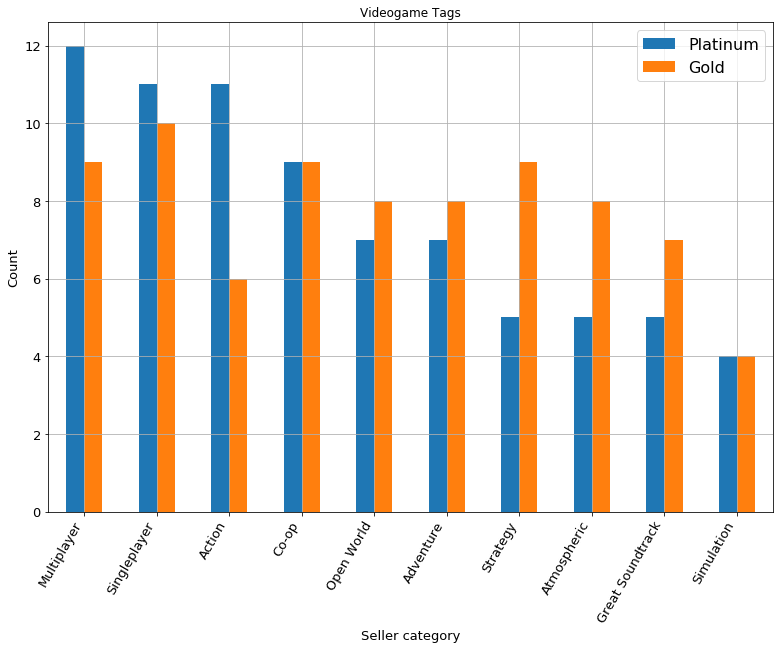

In [348]:
plot_bar_x(top_tags_bestT,tags_list)

In [374]:
top_tags_best

,Action,Adventure,Atmospheric,Co-op,Great Soundtrack,Multiplayer,Open World,Simulation,Singleplayer,Strategy
type,,,,,,,,,,
Platinum,11.0,5.0,7.0,11.0,7.0,12.0,5.0,4.0,9.0,5.0
Gold,10.0,9.0,8.0,6.0,8.0,9.0,8.0,4.0,9.0,7.0


In [379]:
top_tags_bestTT=top_tags_bestT.T

In [380]:
top_tags_bestTT

,Multiplayer,Action,Co-op,Singleplayer,Atmospheric,Great Soundtrack,Adventure,Open World,Strategy,Simulation
type,,,,,,,,,,
Platinum,12.0,11.0,11.0,9.0,7.0,7.0,5.0,5.0,5.0,4.0
Gold,9.0,10.0,6.0,9.0,8.0,8.0,9.0,8.0,7.0,4.0


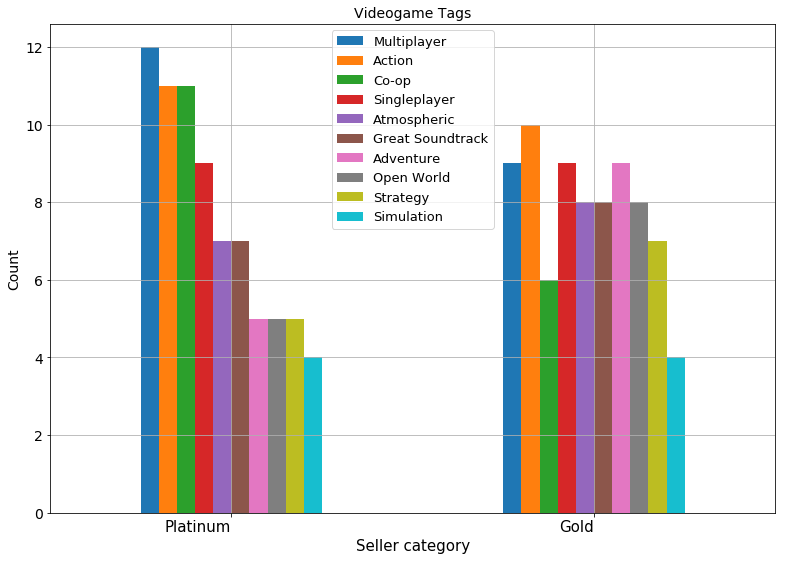

In [391]:

plot_bar_x(top_tags_bestTT,best_types)